In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep="\s+")
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### basic statistical analytics

mean value for each category, variance, standard error

In [3]:
for col in df.columns:
    mean = df[col].mean()
    variance = df[col].var()
    se = df[col].sem()
    print("Colum: {} \t Mean: {} \t Variance: \t {} \t Standard Error: {} ".format(col, mean, variance, se))

Colum: CRIM 	 Mean: 3.6135235573122535 	 Variance: 	 73.98657819906929 	 Standard Error: 0.38238532135825437 
Colum: ZN 	 Mean: 11.363636363636363 	 Variance: 	 543.9368136813633 	 Standard Error: 1.0368095003816977 
Colum: INDUS 	 Mean: 11.136778656126504 	 Variance: 	 47.064442473682135 	 Standard Error: 0.30497988812613064 
Colum: CHAS 	 Mean: 0.0691699604743083 	 Variance: 	 0.06451297303643481 	 Standard Error: 0.011291412406920217 
Colum: NOX 	 Mean: 0.5546950592885372 	 Variance: 	 0.013427635718115326 	 Standard Error: 0.005151391024028495 
Colum: RM 	 Mean: 6.284634387351787 	 Variance: 	 0.4936708502211095 	 Standard Error: 0.031235141929340838 
Colum: AGE 	 Mean: 68.57490118577078 	 Variance: 	 792.358398505069 	 Standard Error: 1.251369525258305 
Colum: DIS 	 Mean: 3.795042687747034 	 Variance: 	 4.434015137382066 	 Standard Error: 0.09361023323108007 
Colum: RAD 	 Mean: 9.549407114624506 	 Variance: 	 75.81636598442468 	 Standard Error: 0.3870848942857865 
Colum: TAX 	 Mea

##### Params
    input-space: the explanatory variables, as n dimensional numpy.ndarray with 1 padding for b0
##### returns
    beta: the coefficient vector beta0 to beta-n (n = number of dimension from input-space)  

In [4]:
def get_coefficient_vector(input_space):
    # fixed target space on the price
    target_space = df['MEDV'].values
    
    # estimate beta-hat
    beta = np.linalg.inv(np.dot(input_space.T, input_space)) # assumes that the dot-product non-singular
    beta = np.dot(beta, np.dot(input_space.T, target_space))
    
    return beta

##### Params
    input_space: explanatory variables as n-dimensional numpy.ndarray
##### returns
    y: The predicted values on MEDV

In [5]:
def predict_values(input_space):
    # 1 padding for beta-zero
    input_space = add_ones(input_space)
    y = np.dot(input_space, get_coefficient_vector(input_space))
    return y

##### Params
    input_space: numpy-array
##### returns
    The same array, but a row of 1s has been added as first row

In [6]:
def add_ones(input_space):
    input_space = np.hstack((np.ones((input_space.shape[0],1)), input_space))
    return input_space

##### Params
    y_true: The actual MEDV values for the different observations
    y_predicted: The predicted MEDV values for the different observations
##### returns
    loss: the quadratic empirical loss

In [7]:
def quadratic_empirical_loss(y_true, y_predicted):
    loss = 0
    for i, elem in enumerate(y_true):
        loss += (elem - y_predicted[i])**2
    loss = loss / y_true.size
    return loss

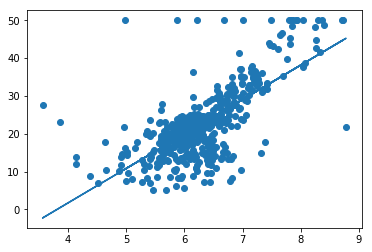

In [8]:
import matplotlib.pyplot as plt
input_space = df[['RM']].values
prediction = predict_values(input_space)

plt.scatter(df['RM'], df['MEDV'])
plt.plot(input_space, prediction)
plt.show()

##### Check which column has a linear relationship to MEDV.
    1. Calculate p-value of every column with respect to MEDV & print them
    2. visualize scatterplot of 2 rel. with smallest p-value

In [20]:
for col in df.columns[:-1]: # -1 cuts MEDV from columns
    standard_error = (df[col]
    slope = get_coefficient_vector(add_ones(df[[col]].values))
    t = slope[1]/ standard_error
    deg_freedom = df[col].size - 2
    p = stats.t.sf(np.abs(t), deg_freedom)*2
    p2 = stats.ttest_ind(df[col], df['MEDV'])
    print("P Value for {}: \t {} \t {} (scipy value as reference)".format(col, p, p2))

P Value for CRIM: 	 0.2780908253335932 	 Ttest_indResult(statistic=-33.795968143264922, pvalue=4.1376062901253735e-168) (scipy value as reference)
P Value for ZN: 	 0.891011522482789 	 Ttest_indResult(statistic=-10.021561247298802, pvalue=1.3371484673796902e-22) (scipy value as reference)
P Value for INDUS: 	 0.03396052799671329 	 Ttest_indResult(statistic=-22.341709385603821, pvalue=3.6408107734187308e-90) (scipy value as reference)
P Value for CHAS: 	 0.0 	 Ttest_indResult(statistic=-54.921028974520297, pvalue=1.4651540072350996e-305) (scipy value as reference)
P Value for NOX: 	 0.0 	 Ttest_indResult(statistic=-53.750196515939322, pvalue=1.6249099761951157e-298) (scipy value as reference)
P Value for RM: 	 0.0 	 Ttest_indResult(statistic=-39.62461149680032, pvalue=6.49016750007408e-208) (scipy value as reference)
P Value for AGE: 	 0.9216360639970633 	 Ttest_indResult(statistic=34.973904946225169, pvalue=3.2094619725068519e-176) (scipy value as reference)
P Value for DIS: 	 5.513710

##### Note: Somehow the manually calculated p-value are different from scipy values, i will still continue with them

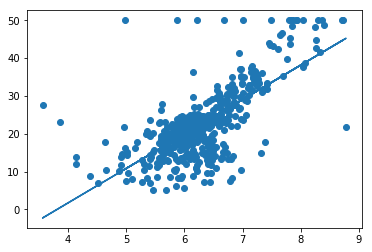

In [21]:
input_space = df[['RM']].values
prediction = predict_values(input_space)

plt.scatter(df['RM'], df['MEDV'])
plt.plot(input_space, prediction)
plt.show()

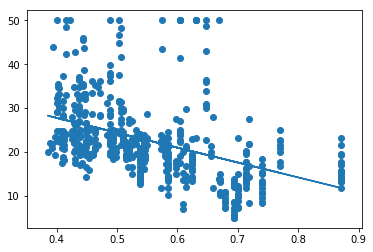

In [22]:
input_space = df[['NOX']].values
prediction = predict_values(input_space)

plt.scatter(df['NOX'], df['MEDV'])
plt.plot(input_space, prediction)
plt.show()

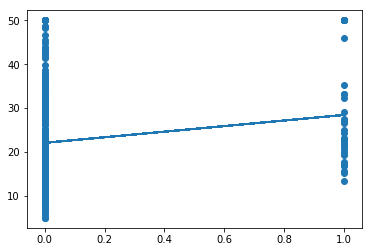

In [23]:
input_space = df[['CHAS']].values
prediction = predict_values(input_space)

plt.scatter(df['CHAS'], df['MEDV'])
plt.plot(input_space, prediction)
plt.show()

In [24]:
# looks weird, idk where the mistake is in my p value calculation

#### increase input_space to two dimensions

###### Just look at the scatterplots on MEDV to have an idea what might be linear

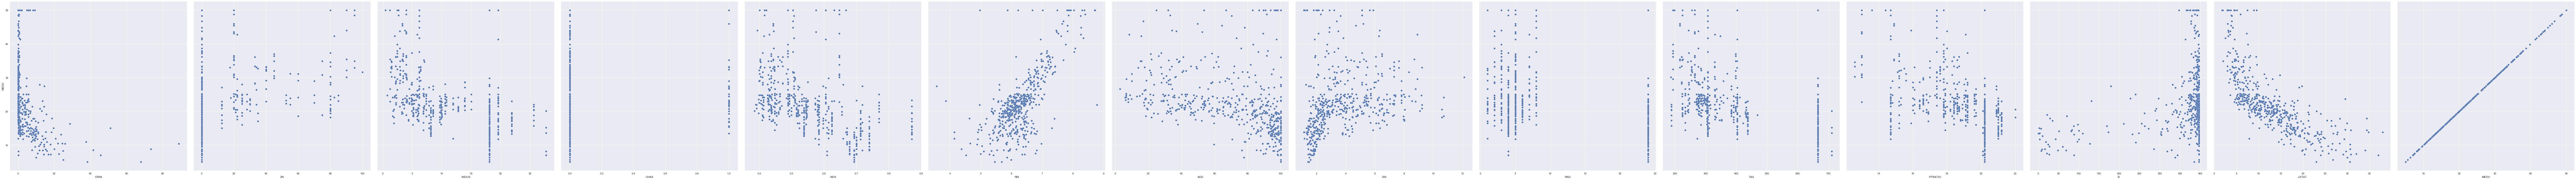

In [25]:
import seaborn as sns
sns.pairplot(data = df, size=10,x_vars=df.columns, y_vars=["MEDV"])
sns.set(style="whitegrid", context='talk')
plt.show()

In [26]:
# choice one: NOX & RM, because they both have low p-values

In [27]:
input_space = df[['NOX', 'RM']].values
prediction = predict_values(input_space)
quadratic_empirical_loss(df['MEDV'], prediction)

39.218116742761012

In [28]:
# choice two: LSTAT & DIS because they look kinda linear in the scatterplot

In [29]:
input_space = df[['LSTAT', 'DIS']].values
prediction = predict_values(input_space)
quadratic_empirical_loss(df['MEDV'], prediction)

36.956482013451499

In [30]:
# choice three: CHAS & RAD because they are not appearing to have linear relationship and I am curious how that affects the error

In [31]:
input_space = df[['CHAS', 'RAD']].values
prediction = predict_values(input_space)
quadratic_empirical_loss(df['MEDV'], prediction)

69.614172753236602

##### Compare empirical loss of one explanatory variable against two

In [32]:
loss = []
for col in df.columns[:-1]: # -1 cuts MEDV from columns
    input_space =  df[[col]].values
    prediction = predict_values(input_space)
    loss.append(quadratic_empirical_loss(df['MEDV'], prediction))

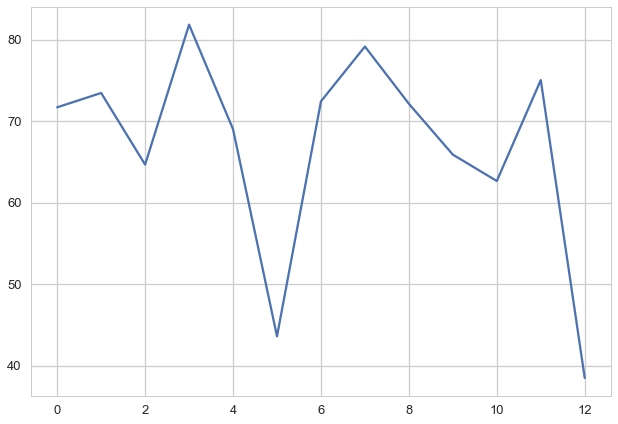

In [33]:
plt.plot(loss)
plt.show()

#### Note:

    It becomes apparent, that the different categories have different strengths in predicting a MEDV. However this plot shows that, only one value (12 = LSTAT) has an empirical loss slightly below 40. 
    
    The quadratic losses of the three combinations (NOX & RM, LSTAT & DIS, CHAS & RAD) were 39,2, 36,9 and 69,6. This indicates, that combinations of explanatory variables, that describe a linear dependency to MEDV can optimize the result (36,9 is better than any single prediction). However, more variables do not necessarily mean a better prediction (as can be seen from the poor result of CHAS & RAD). 